# Understanding and Improving Deep Convolutional Networks in Keras
  
There are many ways to improve training by neural networks. In this chapter, we will focus on our ability to track how well a network is doing, and explore approaches towards improving convolutional neural networks.


## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[Scikit-image Documentation](https://scikit-image.org/docs/stable/)  
[Tensorflow Documentation](https://www.tensorflow.org)
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>numpy.array</td>
    <td>A function from the NumPy library used to create arrays, which are fundamental data structures in numerical computing.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>numpy.zeros</td>
    <td>A function from the NumPy library that creates an array filled with zeros.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>tensorflow.keras.models.Sequential</td>
    <td>A class from the TensorFlow library that represents a linear stack of layers, which is the foundation for building neural network models.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>tensorflow.keras.layers.Dense</td>
    <td>A class from TensorFlow that represents a fully connected (dense) layer in a neural network.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>tensorflow.keras.layers.Conv2D</td>
    <td>A class from TensorFlow that represents a 2D convolutional layer used in convolutional neural networks (CNNs) for image processing tasks.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>tensorflow.keras.layers.Flatten</td>
    <td>A class from TensorFlow that represents a layer used to flatten the input data before feeding it into a fully connected layer.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>model.compile</td>
    <td>A method used to compile a Keras model by specifying loss, optimizer, and metrics.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>tensorflow.keras.datasets.fashion_mnist.load_data</td>
    <td>A function from TensorFlow's Keras API to load the Fashion MNIST dataset.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>pandas.get_dummies</td>
    <td>A function from the Pandas library to perform one-hot encoding on categorical data.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>DataFrame.to_numpy</td>
    <td>A method to convert a Pandas DataFrame to a NumPy array.</td>
  </tr>
  <tr>
    <td>11</td>
    <td>model.fit</td>
    <td>A method to train a Keras model on a given dataset.</td>
  </tr>
  <tr>
    <td>12</td>
    <td>model.evaluate</td>
    <td>A method to evaluate the performance of a trained Keras model on a test dataset.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>tensorflow.keras.callbacks.ModelCheckpoint</td>
    <td>A callback in Keras that allows you to save model weights during training based on certain conditions.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>model.load_weights</td>
    <td>A method to load pre-trained weights into a Keras model.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>tensorflow.keras.layers.Dropout</td>
    <td>A class from TensorFlow that represents a dropout layer, used to prevent overfitting in neural networks.</td>
  </tr>
  <tr>
    <td>16</td>
    <td>tensorflow.keras.layers.BatchNormalization</td>
    <td>A class from TensorFlow that represents a batch normalization layer, which helps stabilize training in deep neural networks.</td>
  </tr>
</table>
  
---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: scikit-image  
Version: 0.21.0  
Summary: Image processing in Python  
  
Name: tensorflow  
Version: 2.13.0  
Summary: TensorFlow is an open source machine learning framework for everyone.  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Snippet to plot all built-in matplotlib styles :
  
```python

x = np.arange(-2, 8, .1)
y = 0.1 * x ** 3 - x ** 2 + 3 * x + 2
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)
```
  

In [1]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations
import tensorflow as tf             # TensorFlow:               Deep-Learning Neural Networks
from tensorflow import keras        # Keras:                    Tensorflow-Keras Integration


# Setting a standard figure size
plt.rcParams['figure.figsize'] = (8, 8)


2023-08-21 13:55:24.766706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Tracking learning
  
During learning, the weights used by the network change, and as they change, the network becomes more attuned to the features of the images that discriminate between classes. This means that the loss function we use for training becomes smaller and smaller. Looking at the change in the loss with learning can be helpful to see whether learning is progressing as expected, and whether the network has learned enough.
  
**Learning curves: training**
  
As long as learning is progressing well, we might expect the loss function to keep going down. For example, here is a curve showing the categorical cross-entropy loss in a network that is learning to classify different types of clothing, measured on the training set. You can see that loss rapidly decreases in the first few epochs of training, after which learning slows down. This is a sign that learning is going rather well.
  
<center><img src='../_images/tracking-learning-with-cnn-keras.png' alt='img' width='500'></center>
  
**Learning curves: validation**
  
On the other hand, if we add the validation loss to this plot, we can see that learning is progressing to some level of loss and then flattens out. What is going on? This is a form of overfitting. Because neural networks have so many parameters that can be adjusted, the weights can be adjusted to accurately classify, but this performance does not generalize well outside of the training set. When validated against a separate set of data, loss cannot become better.
  
<center><img src='../_images/tracking-learning-with-cnn-keras1.png' alt='img' width='500'></center>
  
**Learning curves: overfitting**
  
In fact, if we keep training for many epochs, the validation accuracy can start increasing back up again. This is a sign that we have passed the point at which the model weights are being adjusted in a useful way, and we are starting to over-fit to the specifics of the training data.
  
<center><img src='../_images/tracking-learning-with-cnn-keras2.png' alt='img' width='500'></center>
  
**Plotting training curves**
  
To generate these curves, we need a model like the ones that you have seen before. We capture the results of fitting our model into a 'training' variable, which has a dictionary that stores the learning curves. We can plot the loss in the training set. And also add a plot of the loss in the validation set.
  
<center><img src='../_images/tracking-learning-with-cnn-keras3.png' alt='img' width='500'></center>
  
**Storing the optimal parameters**
  
How do we use the best parameters before the network starts over-fitting? By using the `keras.callbacks` module from Keras which contains functions that can be executed at the end of each training epoch. One of these `callbacks=` is a `ModelCheckpoint` object that can be used to store the weights of a network at the end of each epoch of learning. When it is initialized, a .hdf5 file is created. Here we call it `weights.hdf5`. The callback monitors the validation loss, and will only overwrite the weights whenever the validation loss shows improvement. That is, the validation loss decreases. This means that if the network overfits, the weights will be stored for the epoch at which the validation loss was the smallest, before it started rising back up. The checkpoint object is stored in a list and passed as input to the model fitting procedure. After all `epochs=` of fitting are done, this file contains the best weights.
  
<center><img src='../_images/tracking-learning-with-cnn-keras4.png' alt='img' width='500'></center>
  
**Loading stored parameters**
  
To use these weights, we'll need to initialize the model again with the same architecture, the same layers, with the same number of units in each. We can then use the model's `.load_weights()` method to bring the model weights back to their value when the model was at its best during training. We can then use the weights in all kinds of ways. For example, we can use the model weights to predict the classes of a separate test image data set, using the `.predict_classes()` method. Each entry in the result is the column corresponding to the clothing article in the one-hot encoded array.
  
<center><img src='../_images/tracking-learning-with-cnn-keras5.png' alt='img' width='500'></center>
  


### Plot the learning curves
  
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.
  
1. Fit the model to the training data (`train_data`).
2. Use a validation split of 20%, 3 epochs and batch size of 10.
3. Plot the training loss.
4. Plot the validation loss.

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(4, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 4)         20        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         296       
                                                                 
 flatten (Flatten)           (None, 968)               0         
                                                                 
 dense (Dense)               (None, 3)                 2907      
                                                                 
Total params: 3223 (12.59 KB)
Trainable params: 3223 (12.59 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

Epoch 1/3
4/4 [==============================] - 2s 177ms/step - loss: 9.7231 - accuracy: 0.6500 - val_loss: 0.7680 - val_accuracy: 0.8000
Epoch 2/3
3/4 [=====================>........] - ETA: 0s - loss: 4.5130 - accuracy: 0.8667

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 56ms/step - loss: 3.6741 - accuracy: 0.8500 - val_loss: 2.9621 - val_accuracy: 0.9000
Epoch 3/3
4/4 [==============================] - 0s 29ms/step - loss: 3.0109 - accuracy: 0.8500 - val_loss: 2.4830 - val_accuracy: 0.9000


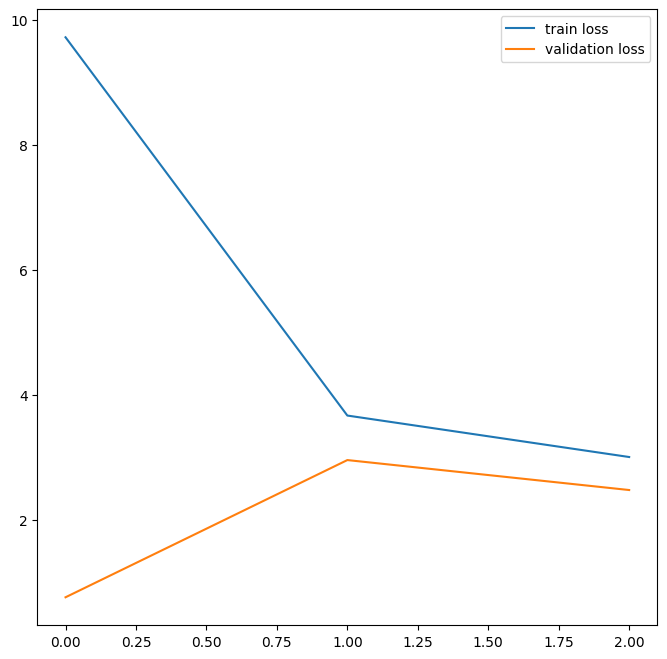

In [4]:
from keras.callbacks import ModelCheckpoint


# Model checkpoint instance
checkpoint = ModelCheckpoint(
    filepath='../_checkpoints/2023-08-21-4-weights.hdf5', 
    monitor='val_loss', 
    save_best_only=True
)

# Train the model and store the training object (including modelCheckpoint callback)
training = model.fit(
    train_data, 
    train_labels, 
    epochs=3, 
    batch_size=10, 
    validation_split=0.2,
    callbacks=[checkpoint]
)

# Extract the history from the training object
history = training.history

# Plot the training loss
plt.plot(history['loss'], label='train loss')

# Plot the validation loss
plt.plot(history['val_loss'], label='validation loss')
plt.legend()
plt.show()

That's great! If you continue for many epochs, the validation loss will start going back up.

### Using stored weights to predict in a test set
  
Model weights stored in an `.hdf5` file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. `test_data`).
  
1. Load the weights from a file called `'2023-08-21-4-weights.hdf5'`.
2. Predict the classes of the first three images from `test_data`.

In [5]:
# Load the weights from file
model.load_weights('../_checkpoints/2023-08-21-4-weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3])

1/1 [==============================] - 0s 194ms/step


array([[8.5013072e-09, 2.3817859e-09, 1.0000000e+00],
       [2.1625967e-21, 1.0000000e+00, 4.1648108e-36],
       [3.4105632e-11, 1.0000000e+00, 1.8502911e-19]], dtype=float32)

Nicely done! How would you use these weights to evaluate the model instead?

## Neural network regularization
  
How do we prevent over-fitting and make the best out of our training data? One of the strategies that has proven effective is regularization. Here we'll discuss two strategies for regularization of convolutional neural networks.
  
**Dropout**
  
The first strategy is called "dropout". In each step of learning, we choose a random subset of the units in a layer and we ignore it. This group of units would be ignored both on the forward pass through the network, as well as in the back-propagation stage.
  
In each learning step:  
- Select a subset of the units
- Ignore it in the forward pass
- And in the back-propagation of error
  
Here is an image that explains this idea, from the original paper by Nitish Srivastava and his colleagues that introduced this idea in 2014. On the left is a fully connected network, and on the right is this network with dropout applied to it during one step of training. This might sound strange, but this regularization strategy can work really well. This is because it allows us to train many different networks on different parts of the data. Each time, the network that is trained is randomly chosen from the full network. This way, if part of the network becomes too sensitive to some noise in the data, other parts will compensate for this, because they haven't seen the samples with this noise. It also helps prevent different units in the network from becoming overly correlated in their activity. One way to think about this is that if one unit learns to prefer horizontal orientations, another unit would be trained to prefer vertical ones.
  
<center><img src='../_images/regularization-with-nn.png' alt='img' width='500'></center>
  
**Dropout in Keras**
  
In Keras, dropout is implemented as a layer. When we construct the network, we add a Dropout layer after the layer for which we want units ignored. When using dropout we'll need to choose what proportion of the units in the layer to ignore in each learning step. For example, here I have chosen to drop 25% of the units in the first layer. The rest of the model that follows is unchanged. Compiling and training the model is also unchanged.
  
<center><img src='../_images/regularization-with-nn1.png' alt='img' width='500'></center>
  
**Batch normalization**
  
Another form of regularization in convolutional neural networks is called Batch Normalization. As the name suggests, this operation takes the output of a particular layer, and rescales it so that it always has 0 mean and standard deviation of 1 in every batch of training. This idea was proposed in a paper by Sergey Ioffe and Christian Szegedy in 2015. The algorithm solves the problem where different batches of input might produce wildly different distributions of outputs in any given layer in the network. Because the adjustments to the weights through back-propagation depends on the activation of the units in every step of learning, this means that the network may progress very slowly through training.
  
- Rescale the outputs
  
**Batch Normalization in Keras**
  
Batch normalization is also implemented as another type of layer that can be added after each one of the layers whose output should be normalized. Here, I have added a single batch normalization operation after the first layer. The rest of the network is unchanged, and compiling and training the network would proceed as you have seen before.
  
<center><img src='../_images/regularization-with-nn2.png' alt='img' width='500'></center>
  
**Be careful when using them together!**
  
Finally, a word of warning: sometimes dropout and batch normalization do not work well together. This is because while dropout slows down learning, making it more incremental and careful, batch normalization tends to make learning go faster. Their effects together may in fact counter each other, and networks sometimes perform worse when both of these methods are used together than they would if neither were used. This has been called "the disharmony of batch normalization and dropout".
  
- Disharmony between dropout and batch normalization
- Dropout tends to slow down learning, making it more incremental
- Batch Normalization tends to make learning go faster


### Adding dropout to your network
  
`Dropout` is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:
  
1. Convolution (15 units, `kernel_size=` 2, `'relu'` `activation=`)
2. `Dropout` (20%)
3. Convolution (5 units, `kernel_size=` 2, `'relu'` `activation=`)
4. `Flatten`
5. `Dense` (3 units, `'softmax'` `activation=`)
  
A Sequential model along with `Dense`, `Conv2D`, `Flatten`, and `Dropout` objects are available in your workspace.
  
1. Add dropout applied to the first layer with 20%.
2. Add a flattening layer.

In [6]:
from keras.layers import Dropout

# Model instanciation
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 dropout (Dropout)           (None, 27, 27, 15)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten_1 (Flatten)         (None, 3380)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 10143     
                                                                 
Total params: 10523 (41.11 KB)
Trainable params: 10523 (41.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Great! Now the kernels will be more different from each other.

### Add batch normalization to your network
  
Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:
  
1. Convolution (15 units, `kernel_size=` 2, `'relu'` `activation=`)
2. `BatchNormalization`
3. Convolution (5 units, `kernel_size=` 2, `'relu'` `activation=`)
4. `Flatten`
5. `Dense` (3 units, `'softmax'` `activation=`)
  
A Sequential model along with `Dense`, `Conv2D`, `Flatten`, and `Dropout` objects are available in your workspace.
  
1. Add the first convolutional layer. You can use the `img_rows` and `img_cols` objects available in your workspace to define the `input_shape=` of this layer.
2. Add batch normalization applied to the outputs of the first layer.

In [7]:
from keras.layers import BatchNormalization


model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_4 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 batch_normalization (Batch  (None, 27, 27, 15)        60        
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten_2 (Flatten)         (None, 3380)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 10143     
                                                                 
Total params: 10583 (41.34 KB)
Trainable params: 10553 (41.22 KB)
Non-trainable params: 30 (120.00 Byte)
_________________________________________________________________


That's useful! That should improve training.

## Interpreting the model
  
One of the main criticisms of convolutional neural networks is that they are "black boxes" and that even when they work very well, it is hard to understand why they work so well. Many efforts are being made to improve the interpretability of neural networks, and this field is likely to evolve rapidly in the next few years. One of the major thrusts of this evolution is that people are interested in visualizing what different parts of the network are doing. Here, I will show you how to take apart a trained convolutional network, select particular parts of the network and analyze their behavior.
  
**Selecting layers**
  
Once a model is constructed and compiled, it will store its layers in an attribute called `.layers`. This is a list of layer objects. For example, here is a network with 2 convolutional layers, followed by a flattening operation and readout with a dense layer.
  
<center><img src='../_images/interpreting-nn-models.png' alt='img' width='500'></center>
  
**Getting model weights**
  
If we want to look at the first convolutional layer, we can pull it out by indexing the first item in this list. The weights for this layer are accessible through the `.get_weights()` method. This method returns a list with two items. The first item in this list is an array that holds the values of the weights for the convolutional kernels for this layer. The kernels array has the shape 3 by 3 by 1 by 5. The first 2 dimensions denote the kernel size. This network was initialized with kernel size of 3. The third dimension denotes the number of channels in the kernels. This is one, because the network was looking at black and white data. The last dimension denotes the number of kernels in this layer: 5. To pull out the first kernel in this layer, we would use the index 0 into the last dimension. Because there is only one channel, we can also index on the channel dimension, to collapse that dimension. This would return the 3 by 3 array containing this convolutional kernel.
  
<center><img src='../_images/interpreting-nn-models1.png' alt='img' width='500'></center>
  
**Visualizing the kernel**
  
We can then visualize this kernel directly, but understanding what kinds of features this kernel is responding to may be hard just from direct observation.
  
<center><img src='../_images/interpreting-nn-models2.png' alt='img' width='500'></center>
  
**Visualizing the kernel responses**
  
To understand what this kernel does, it might sometimes be even more useful to convolve one of the images from our test set with this kernel and see what aspects of the image are emphasized by this kernel. Here, we pick the fourth image from the test_set, an image of a shoe.
  
<center><img src='../_images/interpreting-nn-models3.png' alt='img' width='500'></center>
  
We convolve it with the kernel using the function that we created previously, and create a filtered image that is the result of this convolution. This filter seems to like the external edges of this image on the left.
  
<center><img src='../_images/interpreting-nn-models4.png' alt='img' width='500'></center>
  
We can confirm this by running the convolution over another image. Here, we've picked the fifth image from the set, an image of a t-shirt.
  
<center><img src='../_images/interpreting-nn-models5.png' alt='img' width='500'></center>
  
We see that here as well, vertical edges on the left side of the object are emphasized and on the right side are de-emphasized.
  
<center><img src='../_images/interpreting-nn-models6.png' alt='img' width='500'></center>
  
We can do the same thing with another one of our kernels. Here, we select the second kernel, and convolve the t-shirt image with this kernel. This kernel seems to have learned to detect horizontal edges, particularly on the bottom of the object. Taken together, this gives as an intuition for the kinds of things that the first layer of the network has learned, and can help interpreting the results you see from using this network for a particular task.
  
<center><img src='../_images/interpreting-nn-models7.png' alt='img' width='500'></center>
  

### Extracting a kernel from a trained network
  
One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a `.hdf5` file.
  
1. Load the weights into the model from the file `2023-08-21-4-weights_fashion.hdf5`.
2. Get the first convolutional layer in the model from the layers attribute.
3. Use the `.get_weights()` method to extract the weights from this layer.

In [8]:
model = Sequential()

model.add(Conv2D(5, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(15, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(
    filepath='../_checkpoints/2023-08-21-4-weights_fashion.hdf5', 
    monitor='val_loss', 
    save_best_only=True
)

model.fit(
    train_data,
    train_labels,
    epochs=3,
    validation_split=0.2,
    batch_size=10,
    callbacks=[checkpoint]
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_6 (Conv2D)           (None, 27, 27, 5)         25        
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 15)        315       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 15)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2535)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 7608      
                                                                 
Total params: 7948 (31.05 KB)
Trainable params: 7948 (31.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
4/4 [==============================] - 2s 171ms/step - loss: 7.9950 - accuracy: 0.4000 - val_loss:

In [9]:
# Load the weights into the model
model.load_weights('../_checkpoints/2023-08-21-4-weights_fashion.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][..., 0, 0]
print(kernel)
print(kernel.shape)

[[-0.22873612 -0.05262233]
 [ 0.4225344   0.0449721 ]]
(2, 2)


That's great! You can extract the weights from other layers too.

### Shape of the weights
  
A Keras neural network stores its layers in a list called `model.layers`. For the convolutional layers, you can get the weights using the `.get_weights()` method. This returns a list, and the first item in this list is an array representing the weights of the convolutional kernels. If the shape of this array is `(2, 2, 1, 5)`, what does the first number (`2`) represent?
  
Possible answers
  
- [ ] There are 2 channels in black and white images.
- [x] The kernel size is 2 by 2.
- [ ] The model used a convolutional unit with 2 dimensions.
- [ ] There are 2 convolutional layers in the network.
  
That's correct, each of the 2s in this shape is one of the dimensions of the kernel.

### Visualizing kernel responses
  
One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. Given images in the test_data variable, a function called `extract_kernel()` that extracts a kernel from the provided network, and the function called `convolution()` that we defined in the first chapter, extract the kernel, load the data from a file and visualize it with `matplotlib`.
  
A deep CNN model, a function `convolution()`, along with the kernel you extracted in an earlier exercise is available in your workspace.
  
1. Use the `convolution()` function to convolve the extracted kernel with the first channel of the fourth item in the image array.
2. Visualize the resulting convolution with `imshow()`.

In [10]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

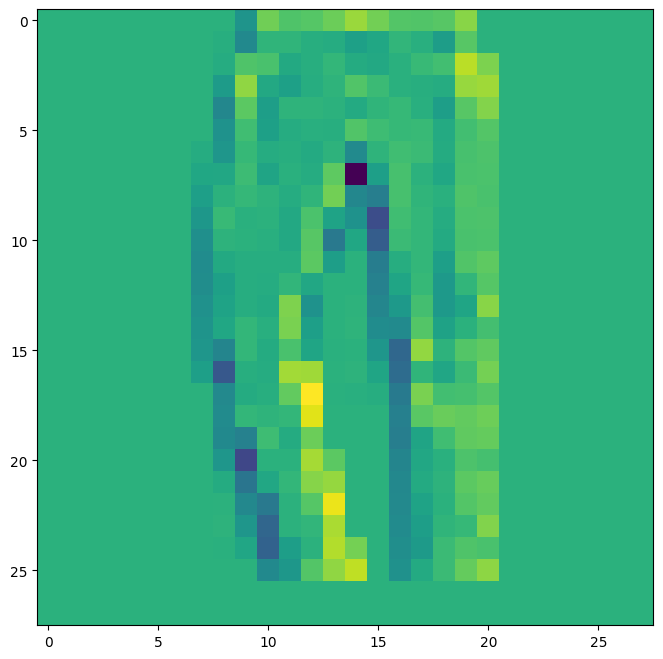

In [13]:
# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

plt.imshow(out)
plt.show()

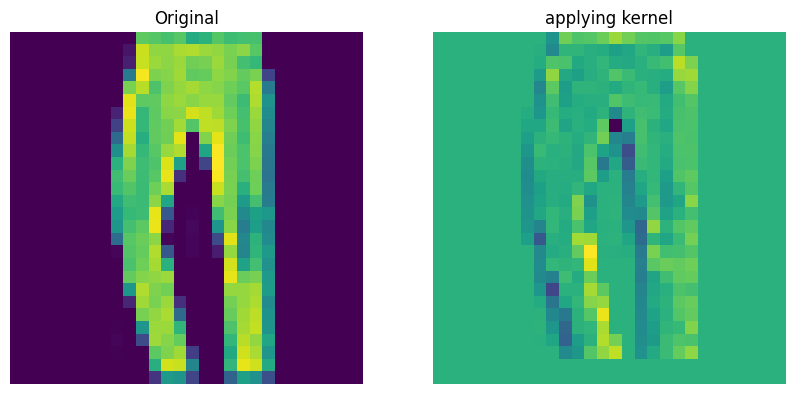

In [12]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')


plot_comparison(test_data[3, :, :, 0], out, 'applying kernel')

That's nice. You can keep going and visualize the kernel responses for all the kernels in this layer!

## Wrapping up
  
Congratulations! You have completed this course on image processing with convolutional neural networks.
  
**What did we learn?**
  
These algorithms are the best we currently have for many computational tasks. Here, you learned about image classification. Classification is a particularly useful task and one that convolutional neural networks excel at. You learned how to set up a training set, a validation set and a test set and how to use them in training a model for classification and how to evaluate it. You learned about the fundamental operations of these networks: convolutions. The development of convolutional layers for neural networks ushered in the current golden age of computation with neural networks, so understanding how they work is particularly valuable, even if you continue to learn about other kinds of neural networks. One of the things that is remarkable about CNNs is that they have a very large number of parameters. This is one of the reasons that large amounts of data are usually required to effectively and accurately train a neural network. We looked at a couple of approaches to reduce the number of parameters: one is to tweak your convolutions, and adapt them to your problem. For example, using strided convolutions. Another approach is to use pooling layers. We also looked at a couple of approaches to improve your network, using regularization. Finally, you learned about ways to understand your network and visualize both the progress of learning, as well as the final result of learning: the parameters of the trained network.
  
**Model interpretation**
  
If you found this topic to be interesting, you might want to read this paper by Chris Olah and his colleagues that explores different aspects of visualization of neural network results. This is an exciting time to learn about CNNs, because the technology is rapidly evolving, and some of the most exciting developments are yet to come.
  
**Road**
  
Where does the road lead to from here?
  
**What next?**
  
There is a wealth of methods and ideas for you to dive into. Here are a few things to learn about next. In this course, you learned about simple architectures where one layer always connects only to the next. But there are other architectures that provide a variety of computational benefits. For example, you might want to learn about residual networks.
  
**Residual networks**
  
These include connections that skip over several layers, and they are called residual networks because the network will use this skipped connection to compute a difference between the input of a stack of layers and their output. Learning this difference, or residual, turns out to often be easier than learning the output. This means that these networks have been surprisingly effective at tasks such as classification.
  
<center><img src='../_images/summary-other-networks-to-consider.png' alt='img' width='500'></center>
  
**What next?**
  
Another topic you might want to explore further is transfer learning: in this approach an already-trained network is adapted to a new task. You've already learned how to read in weights into a network that you've defined. Now imagine training it again on another classification task. Sounds weird, but it's a great strategy for cases where you don't have a lot of data. In addition to convolutional networks that perform classification, there are so-called fully convolutional networks that take an image as input and produce another image as output.
  
**Fully convolutional networks**
  
For example, these networks can be used to find the part of an image that contains a particular kind of object, doing segmentation rather than classification.
  
<center><img src='../_images/summary-other-networks-to-consider1.png' alt='img' width='500'></center>
  
**Generative adversarial networks**
  
A particularly interesting kind of networks are a generative adversarial networks. These complex architectures can be used to train a network to create new images that didn't exist before.
  
<center><img src='../_images/summary-other-networks-to-consider2.png' alt='img' width='500'></center>
  
**Summary**
  
- Learn
- - Image Classification
- - Convolution
- - Reducing the number of parameters
- - - Tweaking your convolutions
- - - Adding pooling layers
- Improving network
- - Regularization
- Understanding network
- - Monitoring learning
- - Interpreting the parameters